--- 
Project for the course in Microeconometrics | Summer 2021, M.Sc. Economics, Bonn University | [Edoardo Falchi](https://github.com/edoardofalchi)

# Replication of David Card & Alan Krueger  (1994) <a class="tocSkip">   
---

This notebook contains my replication of the results from the following paper:

> Card, David, and Alan Krueger. 1994. “Minimum Wages and Employment: A Case Study of the Fast-Food Industry in New Jersey and Pennsylvania.” American Economic Review 84: 772–93.

##### Downloading and viewing this notebook:

* The best way to view this notebook is by downloading it and the repository it is located in from [GitHub](https://github.com/edoardofalchi/ose-data-science-course-projeect-edoardofalchi). Other viewing options like _MyBinder_ or _NBViewer_ may have issues with displaying images or coloring of certain parts (missing images can be viewed in the folder [files](https://github.com/edoardofalchi/ose-data-science-course-projeect-edoardofalchi/tree/master/files) on GitHub).


* The original paper can be accessed  [here](https://www.nber.org/papers/w4509), while the [dataset](https://davidcard.berkeley.edu/data_sets.html) is freely accessible from the author's website.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Introduction" data-toc-modified-id="1.-Introduction-1">1. Introduction</a></span></li><li><span><a href="#2.-Theoretical-Background" data-toc-modified-id="2.-Theoretical-Background-2">2. Theoretical Background</a></span></li><li><span><a href="#3.-Identification" data-toc-modified-id="3.-Identification-3">3. Identification</a></span></li><li><span><a href="#4.-Empirical-Strategy" data-toc-modified-id="4.-Empirical-Strategy-4">4. Empirical Strategy</a></span></li><li><span><a href="#5.-Replication-of-Lindo-et-al.-(2010)" data-toc-modified-id="5.-Replication-of-Lindo-et-al.-(2010)-5">5. Replication of Lindo et al. (2010)</a></span><ul class="toc-item"><li><span><a href="#5.1.-Data-&amp;-Descriptive-Statistics" data-toc-modified-id="5.1.-Data-&amp;-Descriptive-Statistics-5.1">5.1. Data &amp; Descriptive Statistics</a></span></li><li><span><a href="#5.2.-Results" data-toc-modified-id="5.2.-Results-5.2">5.2. Results</a></span><ul class="toc-item"><li><span><a href="#5.2.1.-Tests-of-the-Validity-of-the-RD-Approach" data-toc-modified-id="5.2.1.-Tests-of-the-Validity-of-the-RD-Approach-5.2.1">5.2.1. Tests of the Validity of the RD Approach</a></span></li><li><span><a href="#i.--Extension:-Visual-Validity-Check" data-toc-modified-id="i.--Extension:-Visual-Validity-Check-5.2.2">i.  Extension: Visual Validity Check</a></span></li><li><span><a href="#ii.-Advanced-Validity-Check" data-toc-modified-id="ii.-Advanced-Validity-Check-5.2.3">ii. Advanced Validity Check</a></span></li><li><span><a href="#5.2.2.-First-Year-GPAs-and-Academic-Probation" data-toc-modified-id="5.2.2.-First-Year-GPAs-and-Academic-Probation-5.2.4">5.2.2. First Year GPAs and Academic Probation</a></span></li><li><span><a href="#5.2.3.-The-Immediate-Response-to-Academic-Probation" data-toc-modified-id="5.2.3.-The-Immediate-Response-to-Academic-Probation-5.2.5">5.2.3. The Immediate Response to Academic Probation</a></span></li><li><span><a href="#5.2.4.-The-Impact-onSubsequent-Performance" data-toc-modified-id="5.2.4.-The-Impact-onSubsequent-Performance-5.2.6">5.2.4. The Impact onSubsequent Performance</a></span></li><li><span><a href="#i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term" data-toc-modified-id="i.-Main-Results-for-Impact-on-GPA-&amp;-Probability-of-Placing-Above-Cutoff-in-the-Next-Term-5.2.7">i. Main Results for Impact on GPA &amp; Probability of Placing Above Cutoff in the Next Term</a></span></li><li><span><a href="#ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)" data-toc-modified-id="ii.-Formal-Bound-Analysis-on-Subsequent-GPA-(partial-extension)-5.2.8">ii. Formal Bound Analysis on Subsequent GPA (partial extension)</a></span></li><li><span><a href="#5.2.5.-The-Impacts-on-Graduation" data-toc-modified-id="5.2.5.-The-Impacts-on-Graduation-5.2.9">5.2.5. The Impacts on Graduation</a></span></li></ul></li></ul></li><li><span><a href="#6.-Extension:-Robustness-Checks" data-toc-modified-id="6.-Extension:-Robustness-Checks-6">6. Extension: Robustness Checks</a></span><ul class="toc-item"><li><span><a href="#6.1.--A-Closer-Look-at-Students'-Subsequent-Performance." data-toc-modified-id="6.1.--A-Closer-Look-at-Students'-Subsequent-Performance.-6.1">6.1.  A Closer Look at Students' Subsequent Performance.</a></span><ul class="toc-item"><li><span><a href="#6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2" data-toc-modified-id="6.1.1.-Subsequent-Performance-and-Total-Credits-in-Year-2-6.1.1">6.1.1. Subsequent Performance and Total Credits in Year 2</a></span></li><li><span><a href="#6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)" data-toc-modified-id="6.1.2.-Subsequent-Cumulative-Grade-Point-Average-(CGPA)-6.1.2">6.1.2. Subsequent Cumulative Grade Point Average (CGPA)</a></span></li></ul></li><li><span><a href="#6.2.-Bandwidth-Sensitivity" data-toc-modified-id="6.2.-Bandwidth-Sensitivity-6.2">6.2. Bandwidth Sensitivity</a></span></li></ul></li><li><span><a href="#7.-Conclusion" data-toc-modified-id="7.-Conclusion-7">7. Conclusion</a></span></li><li><span><a href="#8.-References" data-toc-modified-id="8.-References-8">8. References</a></span></li></ul></div>

In [262]:
%matplotlib inline
#!pip install scipy
#!pip install plotly_express
import plotly.express as px
import scipy
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import pandas.io.formats.style
import seaborn as sns
import statsmodels as sm
import statsmodels.formula.api as smf
import statsmodels.api as sm_api
import matplotlib as plt
import matplotlib.pyplot as pltpy
from IPython.display import HTML
#import warnings
#warnings.filterwarnings("ignore")

# 1. Introduction

To have a general idea let's lay the groundwork by posing some questions:

* **What is the causal link the paper is trying to reveal?**  
The big question that makes this paper important: _"How do employers in a low wage labor market respond to an increase in the minimum wage?"_.

    The narrow question this paper seeks to address: _"How does a rise in minimum wage in New Jersey affect employment and wage level within fast food restaurants?"_
The authors compare employment levels in fast-food restaurants in New Jersey and Pennsylvania (its neighboring state without similar policy change) before and after the minimum wage shifts from 4.25\$ to 5.05\$ per hour in New Jersey.

* **What is the key dependent variable?**  
The outcome variable $Y_{i,s,t}$ is employment in restaurant $i$ in state $s$ (NJ or PA) and period $t$ (a month before or eight months after the minimum-wage increase).

* **What is the key independent variable?**  
The treatment dummy taking value 1 for stores in New Jersey during the treatment (i.e. after the implementation of the higher minimum wage) and value 0 otherwise.

* **What is the data source?**  
Researchers constructed a sample frame of fast-food restaurants in New Jersey and eastern Pennsylvania from the Burger King, KFC, Wendy's, and Roy Rogers chain. They collected a first and a second wave interview data via survey that was conducted by telephone and the survey included questions on employment, starting wages, prices, and other store characteristics. First wave of data was collected in between February 15 and March 4 1992(period before the new increased minimum wage) and the second wave is between November 5 and December 31 1992 (period after the new increased minimum wages).

* **What is the identification strategy?**   
The authors use a difference-in-difference approach as the identification strategy and estimate the impact at the micro level. They compare employment levels in fast-food restaurants in New Jersey and Pennsylvania (its neighboring state without similar policy change) before and after the minimum wage shift in New Jersey. The model dependent variables is the change in employment from wave 1 to wave 2 at a particular store and the explanatory variables is set of chracteristics of stores and dummy variable that equals 1 for stores in New Jersey. For another equation with the same dependent variable, the explanatory variables are; the set of charateristics of stores and an alaternative measure of the impcat of the minimum wage at a certain store.

* **What are the assumptions / threats to this identification strategy?**   
The difference-in-difference method faces a central threat known as the parallel assumption - that is, employment levels in New Jersey and Pennsylvania would follow the same time trend in the absence of the minimum wage policy change.   
This identification strategy also assumes that fast-food restaurants in Pennsylvania are the best counterfactuals for those in New Jersey. Of the most importance, the extent of firm competitiveness in the food industry is assumed to be the same in the two states.|


---
# 1. Causal graph
---

![ERROR:Here should be causal graph 1](files/dagitty-model.jpg)
_How do we come up with this causal graph?_

The treated sample (NJ restaurants) at a certain point had a new policy applied to them (wage increase). Authors gathered data so that we can observe them both before and after the treatment went into effect. We argue that the policy treatment D might have had an effect on Y.  

The simple difference between Y before treatment and Y after treatment for the Treated group will reflect two things: the effect of treatment on Y -the part we're interested in- and the way that Y may have changed over time for reasons unrelated to treatment -the part we're not interested in-. Time gives us a back-door path from Treatment to Y. We can get from Treatment to Y either through the Treatment → Y path -which we want- or the Treatment ← Time → Y path -which we don't-.

But we can't close this back door by controlling for time if we only look at the treated group, since time perfectly predicts treatment (it's either Before and you're not treated, or after and you are) - so if we remove all parts of treatment explained by time, there's nothing left!

What can we do? We can add a control group that never gets treated (Pennsylvania restaurants). This is going to let us control for time, but introduces the problem that now we have another back door, since the control and treatment groups may be different. In our scenario, a restaurant receives treatment only if it is in the treated State group (New Jersey) AND in the time period after treatment is applied. In addition to our time back door, we also have a back door from Treatment ← State → Y that we need to close, and we can do so by applying **Difference-in-Differences**.

Looking at differences separately for treatment and control group is a way of controlling for State, closing the Treatment ← State → Y back-door. Then, we take our before/after difference for the treated group and subtract out the before/after difference for the control group . We just took out the before/after difference that was explained by time for the control group, in effect controlling for time and closing the Treatment ← Time → Y back-door.

---
# 2. Dataset
---

The original dataset was in wide format, i.e. there are separate columns for variables of each wave of the survey. For analysis purpose I use a reorganized version of the original dataset based on data provided by [B.E.Hansen](https://www.ssc.wisc.edu/~bhansen/econometrics/). For a detailed description of the variables refer to the [codebook](https://github.com/edoardofalchi/ose-data-science-course-projeect-edoardofalchi/blob/master/material/codebook.pdf). In their study, Card & Krueger measure employment in full time equivalents (FTE) which they define as the number of full time employees plus the number of managers plus 0.5 times the number part-time employees. I added this variable to the dataset, and also I generated the share of full-time employees over FTE.

Now each row is one observation, and therefore each store has two rows. There are 820 observations and 27 variables. The sample contains 410 restaurants (stores), 331 in New Jersey and 79 in Pennsylvania.

In [76]:
def prepare_data():
    '''
    long-format  Card & Krueger (1994) dataset
    '''
    df = pd.read_stata('data/CK1994.dta')
    df = df.sort_values(by="store").set_index("store")
    df["chain"] = df["chain"].astype("category")
    df["meals"] = df["meals"].astype("category")
   # df.iloc[:,1:9] = df.iloc[:,1:9].astype('int')
   # df["time"] = df["time"].astype('int')
    df["FTE"] = df.empft + df.nmgrs + 0.5 * df.emppt
    df["pct_FTE"] = (df.empft / df.FTE)* 100
    df["nj_after"] = df.state * df.time #generate interaction dummy for New Jersey after min wage increase 
    df["price_full_meal"] = df.pricesoda + df.pricefry + df.priceentree
    df=pd.concat([df.iloc[:,0], pd.get_dummies(df, columns=['chain'])],axis=1)#create dummies for each fast-food chain
    df=df.rename(columns={'chain_1.0': 'bk','chain_2.0':'kfc','chain_3.0': 'roys','chain_4.0':'wendys'})
    return df
    


In [78]:
df = prepare_data()
df.head()

,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,ncalls,...,nregisters11,time,FTE,pct_FTE,nj_after,price_full_meal,bk,kfc,roys,wendys
store,,,,,,,,,,,,,,,,,,,,,
1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3.0,0.0,35.0,45.714287,0.0,2.61,1,0,0,0
1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,...,3.0,1.0,44.0,45.454548,1.0,2.74,1,0,0,0
2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,16.0,62.500000,0.0,2.93,1,0,0,0
2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,...,2.0,1.0,15.5,48.387096,1.0,3.00,1,0,0,0
3.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,...,3.0,0.0,15.5,38.709675,0.0,5.10,0,1,0,0


In [69]:
df.dtypes

chain              category
co_owned            float32
state               float32
southj              float32
centralj            float32
northj              float32
pa1                 float32
pa2                 float32
shore               float32
ncalls              float32
empft               float32
emppt               float32
nmgrs               float32
wage_st             float32
inctime             float32
firstinc            float32
meals              category
open                float32
hoursopen           float32
pricesoda           float32
pricefry            float32
priceentree         float32
nregisters          float32
nregisters11        float32
time                float32
FTE                 float32
pct_FTE             float32
nj_after            float32
price_full_meal     float32
bk                    uint8
kfc                   uint8
roys                  uint8
wendys                uint8
dtype: object

In [67]:
fig = px.choropleth(locations=["NJ", "PA"], locationmode="USA-states",
                    color=df[df["time"]==0].groupby("state")["FTE"].mean(),
                    scope="usa", labels={"color":"FTE pre-intervention"}).update_layout(title="Where are located the protagonists of our story?")

fig.show()

In [18]:
bool_split = pd.DataFrame({'chain': ['bk', 'kfc', 'roys', 'wendys']})
print(pd.get_dummies(bool_split))

   chain_bk  chain_kfc  chain_roys  chain_wendys
0         1          0           0             0
1         0          1           0             0
2         0          0           1             0
3         0          0           0             1


In [15]:
df[df["time"]<1].groupby("state")["hoursopen"].mean()

state
0.0    14.525316
1.0    14.418429
Name: hoursopen, dtype: float32

In [65]:
df_extended = pd.read_stata('data/fastfood.dta')

df_extended["date2"] = pd.to_datetime(df_extended["date2"].astype(str), format="%m%d%y")
df_extended["FTE"] = df_extended.empft + df_extended.nmgrs + 0.5 * df_extended.emppt
df_extended["FTE2"] = df_extended.empft2 + df_extended.nmgrs2 + 0.5 * df_extended.emppt2

df_extended

,sheet,chain,co_owned,state,southj,centralj,northj,pa1,pa2,shore,...,meals2,open2r,hrsopen2,psoda2,pfry2,pentree2,nregs2,nregs112,FTE,FTE2
0,46,1,0,0,0,0,0,1,0,0,...,2.0,6.5,16.5,1.03,NaN,0.94,4.0,4.0,40.50,24.00
1,49,2,0,0,0,0,0,1,0,0,...,2.0,10.0,13.0,1.01,0.89,2.35,4.0,4.0,13.75,11.50
2,506,2,1,0,0,0,0,1,0,0,...,1.0,11.0,11.0,0.95,0.74,2.33,4.0,3.0,8.50,10.50
3,56,4,1,0,0,0,0,1,0,0,...,2.0,10.0,12.0,0.92,0.79,0.87,2.0,2.0,34.00,20.00
4,61,4,1,0,0,0,0,1,0,0,...,2.0,10.0,12.0,1.01,0.84,0.95,2.0,2.0,24.00,35.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,423,2,1,1,0,0,1,0,0,0,...,1.0,11.0,11.0,1.05,0.84,2.32,3.0,2.0,9.00,23.75
406,424,2,1,1,0,0,1,0,0,0,...,1.0,11.0,14.0,1.05,0.94,2.32,5.0,3.0,9.75,17.50
407,426,3,1,1,0,0,1,0,0,0,...,2.0,6.0,18.0,1.11,1.05,1.05,6.0,5.0,24.50,20.50
408,427,4,0,1,0,0,1,0,0,0,...,2.0,10.5,12.5,1.11,1.09,2.07,2.0,2.0,14.00,20.50


An interactive explorative analysis visualization can be accessed here, obtained via `Pandas Profiling Report` function.

---
# 2. Descriptive Statistics
---

In [ ]:
prof = ProfileReport(df)
#prof.to_file(output_file='profile_report.html')
#the above line generate an html file stored in the project folder

In [390]:
model = smf.ols(formula = "FTE ~ nj_after + kfc + roys + wendys + co_owned + southj + centralj + pa1", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FTE   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     27.47
Date:                Sat, 19 Jun 2021   Prob (F-statistic):           9.44e-38
Time:                        15:48:49   Log-Likelihood:                -2809.2
No. Observations:                 794   AIC:                             5636.
Df Residuals:                     785   BIC:                             5679.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3532      0.601     40.549      0.0

The result shows “nj_after” is not statistically significant, meaning the minimum wage law has no impact on employment. In a DiD you can control for other covariates that may differ between the groups.

Let's compute the FTE of NJ, PA and the counterfactual:

In [387]:
'''
2x2 dif-in-dif table
'''
# NJ Before and after
NJ_before = round(df.loc[(df['state']==1) & (df['time']!=1),'FTE'].mean(),2)
NJ_after  = round(df.loc[(df['state']==1) & (df['time']==1),'FTE'].mean(),2)

# PA Before and after
PA_before = round(df.loc[(df['state']!=1) & (df['time']!=1),'FTE'].mean(),2)
PA_after  = round(df.loc[(df['state']!=1) & (df['time']==1),'FTE'].mean(),2)

# NJ counterfactual (if no treatment)
NJ_counterfactual = round(NJ_before + ( NJ_before - PA_before ),2)

def did_est():
    did= pd.DataFrame(data=np.array([[NJ_after, NJ_before,NJ_after - NJ_before],
    [PA_after, PA_before, PA_after - PA_before]]), index=['NJ','PA'],columns=['after','before','$\Delta$'])
    return did


In [388]:
did_est()

,after,before,$\Delta$
NJ,21.03,20.44,0.59
PA,21.17,23.33,-2.16


In [385]:
print("Dif-in-dif estimate is", round(did_est()['$\Delta$'][0]-did_est()['$\Delta$'][1],2))

Dif-in-dif estimate is 2.75


This estimate means that the relatives gain after the increase in minimum wage for New Jersey stores compare to Pennslyvania stores (“the difference-in-differences” of the changes in employment for the subset of stores with available employment data in wave 1 and wave 2) is 2.75 FTE employees. Since the number is positive, at face value, the policy change has not led employers to cut employment. However, we should check the standard error to see if the estimated impact is statistically significant.

Indeed, that is what I am going to do now:

In [400]:
model = smf.ols(formula = "FTE ~ state*time", data = df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    FTE   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.964
Date:                Sat, 19 Jun 2021   Prob (F-statistic):              0.118
Time:                        16:28:30   Log-Likelihood:                -2904.2
No. Observations:                 794   AIC:                             5816.
Df Residuals:                     790   BIC:                             5835.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.3312      1.072     21.767      0.0

In [398]:
print("Dif-in-dif coefficient estimate is ",round(model.params[3],2))

Dif-in-dif coefficient estimate is  2.75


We see that the dif-in-dif coefficient estimate from the regression output is the same as computed manually above from the $\Delta$ table. Additionally, now we know that it is not significant at 10% level.

We can plot the DiD like the following:

Text(0.5, 1.0, 'Difference-in-difference: Before and After')

<Figure size 320x240 with 0 Axes>

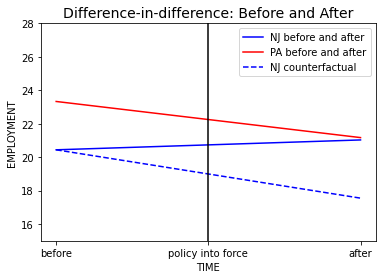

In [370]:

pltpy.figure(num=None, figsize=(4, 3), dpi=80, facecolor='w', edgecolor='k')
fig, ax = pltpy.subplots()
lineNJ, = ax.plot(['0', '1'], [NJ_before, NJ_after],color='blue',label='NJ before and after')
linePA, = ax.plot(['0', '1'], [PA_before, PA_after],color = 'red',label = 'PA before and after')
lineNJ0, = ax.plot(['0', '1'], [NJ_before, NJ_counterfactual],color = 'blue',linestyle='dashed',label='NJ counterfactual')
ax.legend()
pltpy.ylim(15, 28)
plt.pyplot.axvline(x=0.5, color='black')
plt.pyplot.xticks([0,0.5,1], ['before','policy into force','after'])
plt.pyplot.xlabel('TIME')
plt.pyplot.ylabel('EMPLOYMENT')
pltpy.title("Difference-in-difference: Before and After", fontsize="14")

In [ ]:
def table1(data_2):#carolina
    """
    Creates Table 2.
    """
    variables = data_2[
        [
            "KIDCOUNT",
            "more2k",
            "boy1st",
            "boy2nd",
            "two_boys"
        ]
    ]

    table2 = pd.DataFrame()
    table2["All"] = for i in variables.mean()
    table2["Standard Deviation"] = variables.std()
    table2 = table2.astype(float).round(2)
    table2["Description"] = [
        "Children ever born",
        "More than two children",
        "The first child is a boy",
        "The second child is a boy",
        "First two childs are boys",
        "First two childs are girls",
        "Age of mom when first kid was born",
    ]

    return table2

In [347]:
def table1(df):
    '''
    replication Table 1
    '''
    state_unique= df["state"].unique()
    status_unique= df["status2"].unique()
    table1 = pd.DataFrame()
    for i in state_unique:
        for j in staus_unique:
            table1.at[j,i]= sum((df.state == i) & (df.status2 == j))
    table1["All"]=table1[0]+table1[1]

    table1=table1.append(table1.sum(numeric_only=True), ignore_index=True)

    table1 = table1.rename({0: 'PA',1: 'NJ'}, axis=1)
    table1 = table1.rename({0: 'interviewed stores:',1: 'closed sores:',2:'temp closed -highway',
                        3:'under renovation:',4:'refusals:',5:'temp closed - fire',6:'total stores in sample:'}, axis=0)

    return table1

In [349]:
table1(df_extended)

,PA,NJ,All
interviewed stores:,78.0,321.0,399.0
closed sores:,1.0,5.0,6.0
temp closed -highway,0.0,1.0,1.0
under renovation:,0.0,2.0,2.0
refusals:,0.0,1.0,1.0
temp closed - fire,0.0,1.0,1.0
total stores in sample:,79.0,331.0,410.0


In [661]:
df_before= df[df["time"]==0]
df_after= df[df["time"]==1]

def figure1(df_before,df_after):
    
    '''
    Figure 1: distribution of starting wage rates
    '''
    plt.pyplot.figure(figsize=(15, 10), dpi=70, facecolor='w', edgecolor='k')
    plt.pyplot.subplots_adjust(wspace=0.2, hspace=0.4)

    plt.pyplot.xlabel('wage range')
    plt.pyplot.ylabel('percent of stores')
    plt.pyplot.subplot(1, 2, 1)
    plt.pyplot.grid(True)
    plt.pyplot.hist([df_before.loc[(df_before['state']==1),"wage_st"],df_before.loc[(df_before['state']==0),'wage_st']], 
                    bins=np.arange(4.05, 5.85, 0.10),density=True, label=['NJ','PA'])
    plt.pyplot.xlabel('wage range')
    plt.pyplot.ylabel('percent of stores')
    plt.pyplot.legend(loc='upper right')
    plt.pyplot.title('February 1992')
    

    plt.pyplot.subplot(1, 2, 2)
    plt.pyplot.grid(True)
    plt.pyplot.hist([df_after.loc[(df_after['state']==1),'wage_st'],df_after.loc[(df_after['state']==0),'wage_st']], 
                bins=np.arange(4.05, 5.85, 0.10), density=True, label=['NJ','PA'])
    plt.pyplot.xlabel('wage range')
    plt.pyplot.ylabel('percent of stores')
    plt.pyplot.legend(loc='upper right')
    plt.pyplot.title('November 1992')

    return plt.pyplot.show()


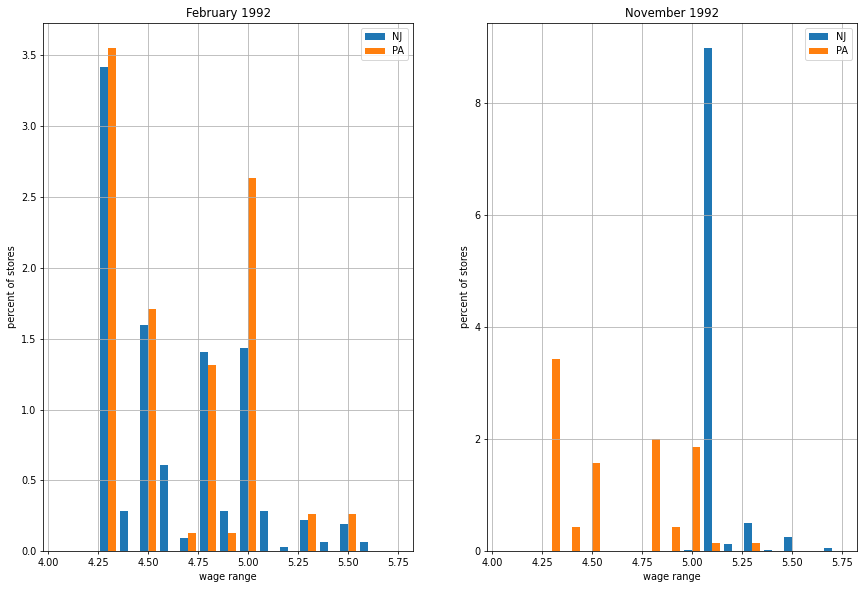

In [662]:
figure1(df_before,df_after)

In [479]:
df_sampletree=df['state','time','FTE']

In [520]:

new_df=pd.DataFrame(columns=["colonna 1", "colonna 2", "colonna 3"],index=["riga 1","riga 2", "riga 3"])
new_df["colonna 1"]=[1,1,1]
new_df["colonna 2"]=[4,4,6]
new_df["colonna 3"]=[7,8,9]

new_df

,colonna 1,colonna 2,colonna 3
riga 1,1,4,7
riga 2,1,4,8
riga 3,1,6,9


In [176]:
#subsetting the original dataframe
df_NJ= df[df["state"]==1]
df_PA= df[df["state"]==0]
df_NJ_0= df[(df["state"]==1) & (df["time"]==0)]
df_NJ_1= df[(df["state"]==1) & (df["time"]==1)]
df_PA_0= df[(df["state"]==0) & (df["time"]==0)]
df_PA_1= df[(df["state"]==0) & (df["time"]==1)]

In [308]:
#table2 - panel 1
def distr_store_type(data_NJ,data_PA):
    variables=['bk','kfc','roys','wendys','co_owned']
    NJ= pd.DataFrame()
    PA= pd.DataFrame()
    #df_NJ= df[df["state"]==1]
    #df_PA= df[df["state"]==0]

    NJ['NJ']= (data_NJ[variables].sum() / len(data_NJ[variables])) * 100
    PA['PA']= (data_PA[variables].sum() / len(data_PA[variables])) * 100
    table2_1 = pd.concat([NJ, PA], axis=1)    
    table2_1['t-stat']=scipy.stats.ttest_ind(df_NJ[variables],df_PA[variables])[0]
    table2_1 = table2_1.astype(float).round(2)
    table2_1= table2_1.rename(index={'bk': 'Burger King','kfc':'KFC','roys':'Roy Rogers',
                                    'wendys':"Wendy's",'co_owned':'company-owned'})


    print("Distribution of store types (percentage)")
    return table2_1

In [309]:
distr_store_type(df_NJ,df_PA)

Distribution of store types (percentage)


,NJ,PA,t-stat
Burger King,41.09,44.30,-0.74
KFC,20.54,15.19,1.53
Roy Rogers,24.77,21.52,0.86
Wendy's,13.60,18.99,-1.72
company-owned,34.14,35.44,-0.31


In [304]:
#table2 - panel 2
def means_wave1(data_NJ,data_PA):
    variables=['FTE','pct_FTE','wage_st','price_full_meal','hoursopen']
    NJ= pd.DataFrame()
    PA= pd.DataFrame()
    #df_NJ_0= df[(df["state"]==1) & (df["time"]==0)]
    #df_PA_0= df[(df["state"]==0) & (df["time"]==0)]

    se_NJ=[]
    a=np.array(data_NJ['FTE'])
    a = a[~np.isnan(a)]
    b=np.array(data_NJ['pct_FTE'])
    b = b[~np.isnan(b)]
    c=np.array(data_NJ['wage_st'])
    c = c[~np.isnan(c)]
    d=np.array(data_NJ['price_full_meal'])
    d = d[~np.isnan(d)]
    e=np.array(data_NJ['hoursopen'])
    e = e[~np.isnan(e)]
    x=[a,b,c,d,e]
    for x in x:
        se_NJ.append(scipy.stats.sem(x))

    NJ['mean']= data_NJ[variables].mean()
    NJ['std_err']= se_NJ
    
    se_PA=[]
    f=np.array(data_PA['FTE'])
    f = f[~np.isnan(f)]
    g=np.array(data_PA['pct_FTE'])
    g = g[~np.isnan(g)]
    h=np.array(data_PA['wage_st'])
    h = h[~np.isnan(h)]
    l=np.array(data_PA['price_full_meal'])
    l = l[~np.isnan(l)]
    m=np.array(data_PA['hoursopen'])
    m = m[~np.isnan(m)]
    z=[f,g,h,l,m]
    for z in z:
        se_PA.append(scipy.stats.sem(z))    
    
    PA['mean']= data_PA[variables].mean()
    PA['std_err']= se_PA
    
   
    table2_2 = pd.concat([NJ, PA], axis=1)
    table2_2.columns = pd.MultiIndex.from_product([['stores in NJ', 'stores in PA'],
                                                ['mean', 'std_err']])
    table2_2['t-stat']=[scipy.stats.ttest_ind(a,f)[0],scipy.stats.ttest_ind(b,g)[0],
                   scipy.stats.ttest_ind(c,h)[0],scipy.stats.ttest_ind(d,l)[0],scipy.stats.ttest_ind(e,m)[0]]

    data_NJ['wage_4.25$']= data_NJ['wage_st']==4.25
    wage_425_NJ_0=(data_NJ['wage_4.25$'].sum() / len(data_NJ['wage_4.25$']))*100

    se_425_NJ_0= scipy.stats.sem(data_NJ['wage_4.25$'])*100

    data_PA['wage_4.25$']= data_PA['wage_st']==4.25
    wage_425_PA_0=(data_PA['wage_4.25$'].sum() / len(data_PA['wage_4.25$']))*100

    se_425_PA_0= scipy.stats.sem(data_PA['wage_4.25$'])*100

    test_wage_425 = scipy.stats.ttest_ind(data_NJ['wage_4.25$'],data_PA['wage_4.25$'])[0]

    table2_2.loc["wage_425",:]=(wage_425_NJ_0,se_425_NJ_0,wage_425_PA_0,se_425_PA_0,test_wage_425)#add as new row to dataframe

    table2_2 = table2_2.astype(float).round(2)
    table2_2= table2_2.rename(index={'FTE': 'FTE employment','pct_FTE':'% full-time employees','wage_st':'starting wage',
                                    'price_full_meal':'price of full meal','hoursopen':'hours open','wage_425':'wage = 4.25$ (%)'})


    print("Means in wave 1")
    return table2_2



In [305]:
means_wave1(df_NJ_0,df_PA_0)

Means in wave 1


stores in NJ         stores in PA         t-stat
                              mean std_err         mean std_err       
FTE employment               20.44    0.51        23.33    1.35  -2.35
% full-time employees        32.85    1.33        35.04    2.73  -0.73
starting wage                 4.61    0.02         4.63    0.04  -0.41
price of full meal            3.35    0.04         3.04    0.07   3.79
hours open                   14.42    0.15        14.53    0.33  -0.30
wage = 4.25$ (%)             30.51    2.53        32.91    5.32  -0.41

In [302]:
#table2 - panel 3
def means_wave2(data_NJ,data_PA):
    variables=['FTE','pct_FTE','wage_st','price_full_meal','hoursopen']
    NJ= pd.DataFrame()
    PA= pd.DataFrame()
    #df_NJ_1= df[(df["state"]==1) & (df["time"]==1)]
    #df_PA_1= df[(df["state"]==0) & (df["time"]==1)]

    se_NJ=[]
    a=np.array(data_NJ['FTE'])
    a = a[~np.isnan(a)]
    b=np.array(data_NJ['pct_FTE'])
    b = b[~np.isnan(b)]
    c=np.array(data_NJ['wage_st'])
    c = c[~np.isnan(c)]
    d=np.array(data_NJ['price_full_meal'])
    d = d[~np.isnan(d)]
    e=np.array(data_NJ['hoursopen'])
    e = e[~np.isnan(e)]
    x=[a,b,c,d,e]
    for x in x:
        se_NJ.append(scipy.stats.sem(x))

    NJ['mean']= data_NJ[variables].mean()
    NJ['std_err']= se_NJ
    
    se_PA=[]
    f=np.array(data_PA['FTE'])
    f = f[~np.isnan(f)]
    g=np.array(data_PA['pct_FTE'])
    g = g[~np.isnan(g)]
    h=np.array(data_PA['wage_st'])
    h = h[~np.isnan(h)]
    l=np.array(data_PA['price_full_meal'])
    l = l[~np.isnan(l)]
    m=np.array(data_PA['hoursopen'])
    m = m[~np.isnan(m)]
    z=[f,g,h,l,m]
    for z in z:
        se_PA.append(scipy.stats.sem(z))    
    
    PA['mean']= data_PA[variables].mean()
    PA['std_err']= se_PA
    
   
    table2_3 = pd.concat([NJ, PA], axis=1)
    table2_3.columns = pd.MultiIndex.from_product([['stores in NJ', 'stores in PA'],
                                                ['mean', 'std_err']])
    table2_3['t-stat']=[scipy.stats.ttest_ind(a,f)[0],scipy.stats.ttest_ind(b,g)[0],
                   scipy.stats.ttest_ind(c,h)[0],scipy.stats.ttest_ind(d,l)[0],scipy.stats.ttest_ind(e,m)[0]]

    data_NJ['wage_4.25$']= data_NJ['wage_st']==4.25
    wage_425_NJ_1=(data_NJ['wage_4.25$'].sum() / len(data_NJ['wage_4.25$']))*100

    se_425_NJ_1= scipy.stats.sem(data_NJ['wage_4.25$'])*100

    data_PA['wage_4.25$']= data_PA['wage_st']==4.25
    wage_425_PA_1=(data_PA['wage_4.25$'].sum() / len(data_PA['wage_4.25$']))*100

    se_425_PA_1= scipy.stats.sem(data_PA['wage_4.25$'])*100

    
    table2_3.loc["wage_425",:]=(wage_425_NJ_1,se_425_NJ_1,wage_425_PA_1,se_425_PA_1,float("NaN"))#add as new row to dataframe
    
    
    data_NJ['wage_5.05$']= data_NJ['wage_st']==5.05
    wage_505_NJ_1=(data_NJ['wage_5.05$'].sum() / len(data_NJ['wage_5.05$']))*100

    se_505_NJ_1= scipy.stats.sem(data_NJ['wage_5.05$'])*100

    data_PA['wage_5.05$']= data_PA['wage_st']==5.05
    wage_505_PA_1=(data_PA['wage_5.05$'].sum() / len(data_PA['wage_5.05$']))*100

    se_505_PA_1= scipy.stats.sem(data_PA['wage_5.05$'])*100

    test_wage_505 = scipy.stats.ttest_ind(data_NJ['wage_5.05$'],data_PA['wage_5.05$'])[0]
    
    table2_3.loc["wage_505",:]=(wage_505_NJ_1,se_505_NJ_1,wage_505_PA_1,se_505_PA_1,test_wage_505)#add as new row to dataframe

    table2_3 = table2_3.astype(float).round(2)
    table2_3= table2_3.rename(index={'FTE': 'FTE employment','pct_FTE':'% full-time employees','wage_st':'starting wage',
                                    'price_full_meal':'price of full meal','hoursopen':'hours open','wage_425':'wage = 4.25$ (%)',
                                    'wage_505':'wage = 5.05$ (%)'})


    print("Means in wave 2")
    return table2_3



In [303]:
means_wave2(df_NJ_1,df_PA_1)

Means in wave 2


stores in NJ         stores in PA         t-stat
                              mean std_err         mean std_err       
FTE employment               21.03    0.52        21.17    0.94  -0.12
% full-time employees        35.87    1.38        30.38    2.81   1.75
starting wage                 5.08    0.01         4.62    0.04  19.71
price of full meal            3.41    0.04         3.03    0.07   4.73
hours open                   14.42    0.15        14.65    0.33  -0.67
wage = 4.25$ (%)              0.00    0.00        25.32    4.92    NaN
wage = 5.05$ (%)             85.50    1.94         1.27    1.27  20.96

In [21]:
'''    
def describe_covariates_at_cutoff(data, bandwidth):
    """
      Summary table used for validity checks. 
    """
    variables = ['hsgrade_pct', 'totcredits_year1', 'age_at_entry', 'male', 'english', 
                 'bpl_north_america','loc_campus1', 'loc_campus2', 'loc_campus3']

    treat = pd.DataFrame()
    untreat = pd.DataFrame()

    sample = data[abs(data['dist_from_cut']) < bandwidth]
    sample_treat = sample[sample['dist_from_cut'] < 0]
    sample_untreat = sample[sample['dist_from_cut'] >= 0]

    # treated sample.
    treat['Mean'] = sample_treat[variables].mean()
    treat['Std.'] = sample_treat[variables].std()
    # untreated sample.
    untreat['Mean'] = sample_untreat[variables].mean()
    untreat['Std.'] = sample_untreat[variables].std()

    table = pd.concat([treat, untreat], axis=1)
    table.columns = pd.MultiIndex.from_product([['Below cutoff', 'Above cutoff'],
                                                ['Mean', 'Std.']])
    table = table.astype(float).round(2)

    table['Description'] = ["High School Grade Percentile", "Credits attempted first year", 
                            "Age at entry", "Male", "English is first language", 
                            "Born in North America", "At Campus 1", "At Campus 2", "At Campus 3"]

    return table
    '''

bk          41.087613
kfc         20.543807
roys        24.773414
wendys      13.595166
co_owned    34.138973
dtype: float64

In [264]:
df_extended.dtypes

sheet                int16
chain                 int8
co_owned              int8
state                 int8
southj                int8
centralj              int8
northj                int8
pa1                   int8
pa2                   int8
shore                 int8
ncalls                int8
empft              float32
emppt              float32
nmgrs              float32
wage_st            float32
inctime            float32
firstinc           float32
bonus                 int8
pctaff             float32
meals                 int8
open               float32
hrsopen            float32
psoda              float32
pfry               float32
pentree            float32
nregs              float64
nregs11            float64
type2                 int8
status2               int8
date2       datetime64[ns]
ncalls2            float64
empft2             float32
emppt2             float32
nmgrs2             float32
wage_st2           float32
inctime2           float64
firstin2           float32
s

In [260]:

bonus_NJ_0=(df_NJ_0['wage_4.25$'].sum() / len(df_NJ_0['wage_4.25$']))*100

se_425_NJ_0= scipy.stats.sem(df_NJ_0['wage_4.25$'])*100

df_PA_0['wage_4.25$']= df_PA_0['wage_st']==4.25
wage_425_PA_0=(df_PA_0['wage_4.25$'].sum() / len(df_PA_0['wage_4.25$']))*100

se_425_PA_0= scipy.stats.sem(df_PA_0['wage_4.25$'])*100

test_wage_425 = scipy.stats.ttest_ind(df_NJ_0['wage_4.25$'],df_PA_0['wage_4.25$'])[0]


C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Utente\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



5.32047266367869

In [255]:
wage_425_NJ_0

30.513595166163142

In [128]:
#variables=['FTE','pct_FTE','wage_st','price_full_meal','hoursopen']
a=np.array(df_NJ_0[['wage_st','FTE']])
#a = a[~np.isnan(a)]
#scipy.stats.sem(a)
a

array([[ 4.5 , 35.  ],
       [ 4.75, 16.  ],
       [ 4.25, 15.5 ],
       [ 4.75, 19.  ],
       [ 4.5 , 24.  ],
       [ 5.  ,  5.  ],
       [ 4.8 ,   nan],
       [ 4.37, 36.  ],
       [ 4.25, 29.  ],
       [ 4.25, 29.  ],
       [ 4.37, 21.25],
       [ 4.5 , 15.5 ],
       [ 5.12, 16.  ],
       [ 4.6 , 19.5 ],
       [ 4.5 , 21.  ],
       [ 4.37, 14.  ],
       [ 4.25, 30.5 ],
       [ 4.25, 23.5 ],
       [ 4.45, 14.  ],
       [ 4.35, 14.5 ],
       [ 4.5 , 15.5 ],
       [ 4.75, 26.5 ],
       [ 5.56, 41.5 ],
       [ 5.  , 13.  ],
       [ 4.5 ,  8.  ],
       [ 4.5 ,  5.5 ],
       [ 5.  , 10.  ],
       [ 5.25, 15.  ],
       [ 4.5 , 23.25],
       [ 5.  , 26.  ],
       [ 4.95, 15.5 ],
       [ 4.5 , 32.25],
       [ 5.5 , 18.  ],
       [ 4.25, 30.  ],
       [ 4.25,   nan],
       [ 4.5 , 30.5 ],
       [ 4.8 , 14.  ],
       [ 4.25, 27.  ],
       [ 4.5 , 18.5 ],
       [ 4.25, 38.  ],
       [ 4.25, 16.5 ],
       [ 4.5 , 50.  ],
       [ 4.75, 20.5 ],
       [ 4.

In [166]:
a=np.array(df_NJ_0['FTE'])
a = a[~np.isnan(a)]
b=np.array(df_NJ_0['pct_FTE'])
b = b[~np.isnan(b)]
c=np.array(df_NJ_0['wage_st'])
c = c[~np.isnan(c)]
d=np.array(df_NJ_0['price_full_meal'])
d = d[~np.isnan(d)]
e=np.array(df_NJ_0['hoursopen'])
e = e[~np.isnan(e)]
#scipy.stats.sem([a,b,c,d,e])
dict([a,b,c,d,e])

ValueError: dictionary update sequence element #0 has length 321; 2 is required

In [186]:
NJ= pd.DataFrame()
NJ['se']=[]
variables=['FTE','pct_FTE','wage_st','price_full_meal','hoursopen']
for i in variables:
    NJ['se'].loc[variables.index(i)]=scipy.stats.sem(np.array(df_NJ_0[i]))

NJ
NJ_before = round(df.loc[(df['state']==1) & (df['time']!=1),'FTE'].mean(),2)

,se


In [161]:
variables=['FTE','pct_FTE','wage_st','price_full_meal','hoursopen']
#dict(variables)
variables['pct_FTE']

TypeError: list indices must be integers or slices, not str

In [188]:
f=[]
variables=['FTE','pct_FTE','wage_st','price_full_meal','hoursopen']
a=np.array(df_NJ_0['FTE'])
a = a[~np.isnan(a)]
b=np.array(df_NJ_0['pct_FTE'])
b = b[~np.isnan(b)]
c=np.array(df_NJ_0['wage_st'])
c = c[~np.isnan(c)]
d=np.array(df_NJ_0['price_full_meal'])
d = d[~np.isnan(d)]
e=np.array(df_NJ_0['hoursopen'])
e = e[~np.isnan(e)]
x=[a,b,c,d,e]
for x in x:
    f.append(scipy.stats.sem(x))
f
#scipy.stats.ttest_ind(a,b)

[0.5082607155080399,
 1.3256101057472447,
 0.01954569233795943,
 0.03654412054109167,
 0.1527704196128995]